# Biodiversity in National Parks Data Explration and Analysis

In this file I will explore the data and try to answer some questions about the biodiversity in National Parks. I will use the following datasets:  
- `observations.csv`
- `species_info.csv`


## Problem Defenition

There are many speicies observed within the national parks, some of them are endagered. I will try to analyse the data and attemt to find statistical insights about the conservational sataus of these species in relation to the parks and categories they belong to.

## Analysis

Descriptive:

- What is the distribution of conservation status for species?
- what is the park that has the most endangered species?
- what is the category that has the most endangered species?
- what is the most common species in each park?

Exploratory:

- is there a correlation between multiple types of speiceis and their conservation status?
- is there a correlation between the park and the conservation status of the species?
- is there a correlation between the category and the conservation status of the species?

Inferential:

- what is the probability of a species being endangered for each category?
- what is the probability of a species being endangered for each park?
- what is the probability of a species being endangered for each category and park?

Predictive:

- can we predict the conservation status of a species based on its category, park, and observations?


## Observing the data  

I will start by loading the data and exploring the first few rows of each dataset.

In [3]:
import csv 
import numpy as np
import pandas as pd
import seaborn as sns


In [4]:
observations_df = pd.read_csv('observations.csv')
species_df = pd.read_csv('species_info.csv')

print(observations_df.head())
print(observations_df.info())
print(observations_df.describe())

            scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None
       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000

In [5]:
print(species_df.head())
print(species_df.info())
print(species_df.describe())

  category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      

Observing these datasets we can assume that the structure of the data is as follows:
- observations.csv:  

|Name|Type|Description|
|---|---|---|
|scientific_name| String | The scientific name of the species (foreign key) |
| park_name | String | The name of the national park where the species was observed |
| Observations | Int | The number of times the species was observed in the park |

- species_info.csv:

|Name|Type| Description|
|---|---| ---|
| category | String | The category of the species (mammal, bird, reptile, etc.) |
| scientific_name | String | The scientific name of the species (primary key)|
| common_names | String | The common names of the species |
| conservation_status | String | The species conservation status |

scientific name is the unique identifier for the species in both datasets.

### Cleaning the data 

immediatley there are NaN's in the conservation_status column. I will replace these with 'No Intervention' as it is likely that these species are not in danger.

In [6]:
#replace nan values with 'No Intervention'
species_df.fillna('No Intervention', inplace=True)
species_df.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,No Intervention
1,Mammal,Bos bison,"American Bison, Bison",No Intervention
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",No Intervention
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",No Intervention
4,Mammal,Cervus elaphus,Wapiti Or Elk,No Intervention


i will also check for duplicates, incorrect data types and other missing values.

In [7]:
#check for missing values
print("species_df")
print(species_df.count())
print("\nobservations_df")
print(observations_df.count())
#no missing values

species_df
category               5824
scientific_name        5824
common_names           5824
conservation_status    5824
dtype: int64

observations_df
scientific_name    23296
park_name          23296
observations       23296
dtype: int64


In [8]:
#check for dulplicates 
print(species_df.duplicated().sum())
print(observations_df.duplicated().sum())

observations_df.drop_duplicates()
pass

0
15


In [9]:
#data types are correct
observations_df.dtypes

scientific_name    object
park_name          object
observations        int64
dtype: object

### Data Inspection
I will now inspect the data for any initial trends, outliers or other interesting information.

#### General Observations

In [10]:
#count of each park name in observations_df
observations_df.park_name.value_counts().reset_index()
#there is an equal number of observation records for each park

,park_name,count
0,Great Smoky Mountains National Park,5824
1,Yosemite National Park,5824
2,Bryce National Park,5824
3,Yellowstone National Park,5824


In [11]:
#the count of each category in species_df
species_df.category.value_counts().reset_index()
#this shows that there lots of vascular plant observation records

,category,count
0,Vascular Plant,4470
1,Bird,521
2,Nonvascular Plant,333
3,Mammal,214
4,Fish,127
5,Amphibian,80
6,Reptile,79


In [12]:
#count of each conservation status in species_df
species_df.conservation_status.value_counts().reset_index()
#this shows that most species are not under any conservation status

,conservation_status,count
0,No Intervention,5633
1,Species of Concern,161
2,Endangered,16
3,Threatened,10
4,In Recovery,4


#### Deeper Observations

In [13]:
#number of obserevations for each park
observations_df.groupby('park_name').observations.sum().reset_index()
#yellowstone has the most observations
#TODO: see if theres is a correlation between size of park and number of observations

,park_name,observations
0,Bryce National Park,576025
1,Great Smoky Mountains National Park,431820
2,Yellowstone National Park,1443562
3,Yosemite National Park,863332


In [14]:
#number of obsrevations for each category
observations_df.merge(species_df).groupby('category').observations.sum().reset_index().sort_values(by='observations', ascending=False)


,category,observations
6,Vascular Plant,2795312
1,Bird,332371
4,Nonvascular Plant,190653
3,Mammal,163120
2,Fish,72901
5,Reptile,45822
0,Amphibian,45068


In [15]:
#number of observations for each conservation status
observations_df.merge(species_df).groupby('conservation_status').observations.sum().reset_index().sort_values(by='observations', ascending=False)

,conservation_status,observations
2,No Intervention,3542326
3,Species of Concern,93962
0,Endangered,3513
4,Threatened,3339
1,In Recovery,2107


In [16]:
#number of observations for each species
ovservations_speicies =  observations_df.groupby('scientific_name').observations.sum().reset_index().sort_values(by='observations', ascending=False)
ovservations_speicies

,scientific_name,observations
4993,Streptopelia decaocto,1785
2452,Holcus lanatus,1780
1103,Castor canadensis,1725
2555,Hypochaeris radicata,1720
4179,Puma concolor,1711
...,...,...
4247,Rana sierrae,144
3394,Noturus baileyi,143
5356,Vermivora bachmanii,141
805,Canis rufus,137


In [17]:
#number of observations for each park and category
obsercations_park_category = observations_df.merge(species_df).groupby(['park_name', 'category']).observations.sum().reset_index().sort_values(by='observations', ascending=False)
obsercations_park_category

,park_name,category,observations
20,Yellowstone National Park,Vascular Plant,1218162
27,Yosemite National Park,Vascular Plant,727895
6,Bryce National Park,Vascular Plant,484373
13,Great Smoky Mountains National Park,Vascular Plant,364882
15,Yellowstone National Park,Bird,144300
22,Yosemite National Park,Bird,86612
18,Yellowstone National Park,Nonvascular Plant,83021
17,Yellowstone National Park,Mammal,70701
1,Bryce National Park,Bird,58590
25,Yosemite National Park,Nonvascular Plant,49783


## Descriptive Analysis

1. What is the distribution of conservation status for species?
2. what is the park that has the most endangered species?
3. what is the category that has the most endangered species?
4. what is the most common species in each park?

<Axes: xlabel='category', ylabel='park_name'>

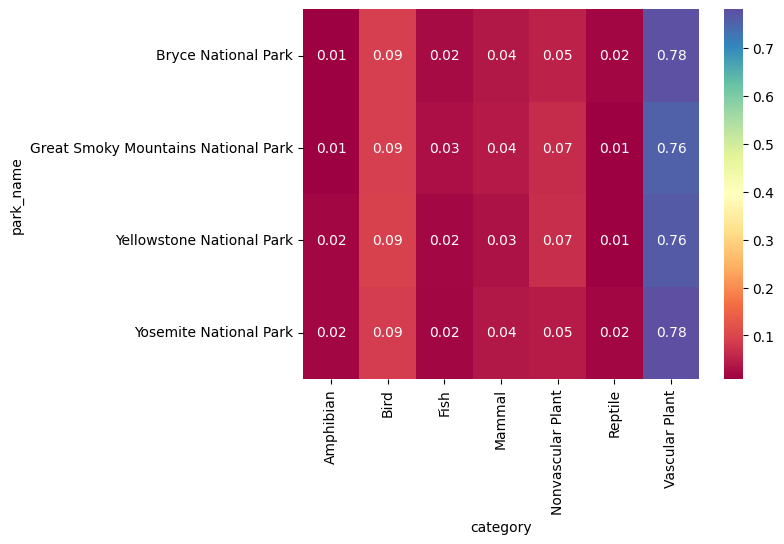

In [44]:
# cross tab park - category
# FIXME: i dont think its normalising for each park
ct_park_species = pd.crosstab(observations_df['park_name'],
                              species_df['category'], 
                              values=observations_df['observations'], 
                              aggfunc='sum', 
                              normalize='index')
sns.heatmap(ct_park_species, cmap='Spectral', annot=True, fmt='.2f')



<Axes: xlabel='category', ylabel='park_name'>

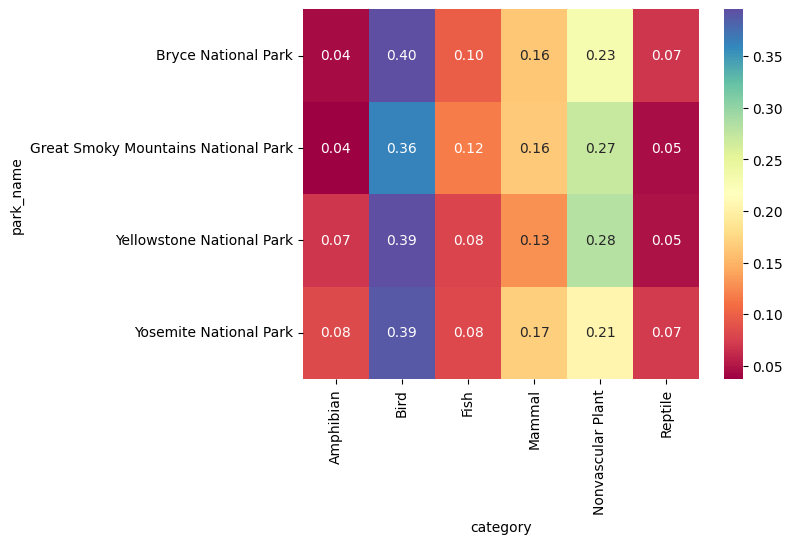

In [43]:
#cross tab park - category minus vascular plants
# FIXME: i dont think its normalising for each park
ct_park_species_minus_vascular = pd.crosstab(observations_df['park_name'],
                                             species_df[species_df['category']!='Vascular Plant']['category'], 
                                             values=observations_df['observations'], 
                                             aggfunc='sum',
                                             normalize='index')
sns.heatmap(ct_park_species_minus_vascular, cmap='Spectral', annot=True, fmt='.2f')

<Axes: xlabel='conservation_status', ylabel='park_name'>

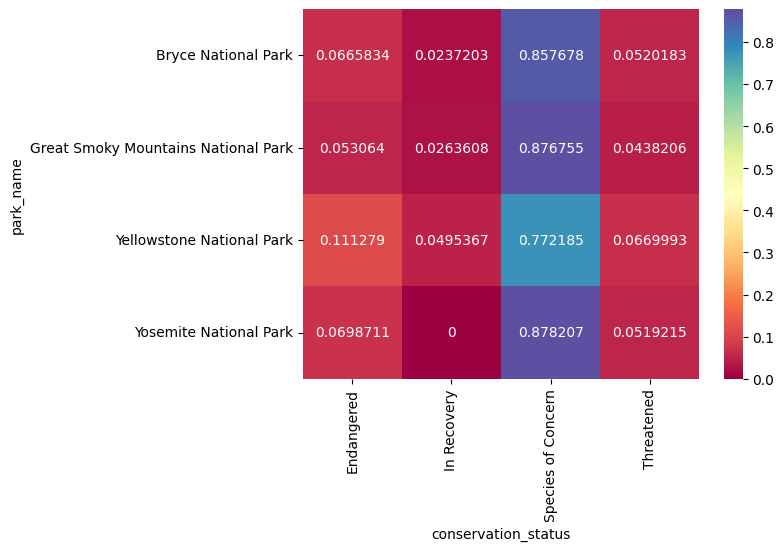

In [46]:
#cross tab park - conservation status minus no intervention
# FIXME: i dont think its normalising for each park
ct_park_species_minus_no_intervention = pd.crosstab(observations_df['park_name'],
                                                    species_df[species_df['conservation_status']!='No Intervention']['conservation_status'], 
                                                    values=observations_df['observations'],
                                                    aggfunc='sum',
                                                    normalize='index')
sns.heatmap(ct_park_species_minus_no_intervention, cmap='Spectral', annot=True, fmt='g')


<Axes: xlabel='conservation_status', ylabel='category'>

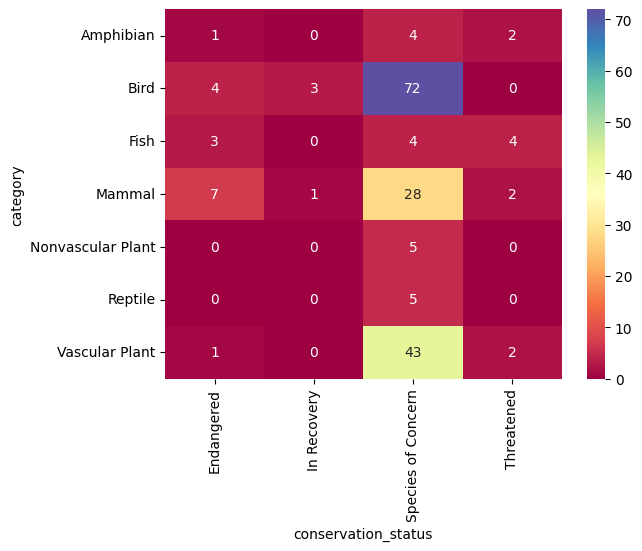

In [47]:
#crosstab category - conservation status minus no intervention
ct_category_conservation = pd.crosstab(species_df[species_df['conservation_status']!='No Intervention']['category'], 
                                       species_df[species_df['conservation_status']!='No Intervention']['conservation_status'])
sns.heatmap(ct_category_conservation, cmap='Spectral', annot=True, fmt='g')

In [19]:
# 1 - What is the distribution of conservation status for species?
